(prob-models)=
# Probabilistic models

**THIS CHAPTER IS CURRENTLY UNDER CONSTRUCTION!!!**

## Probabilistic graphical models





### Deterministic flows of influence

Let's begin in the simple case of two (deterministic) vectors $\bx\in \bbr^n$ and $\by \in \bbr^m$. By saying that there is a _deterministic flow of influence_ from $\bx$ to $\by$, we shall mean simply that there is a function

$$
g: \bbr^n \to \bbr^m, \quad \by = g(\bx),
$$

called a _link function_. It will be convenient to depict this situation graphically by representing the variables $\bx$ and $\by$ as nodes in a <a href="https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)">graph</a> and the link function $g$ as an arrow between them:

```{image} ../img/det-link.svg
:width: 30%
:align: center
```
&nbsp;

Very often, the label $g$ on the link function will be omitted.

It could be the case that flow of influence is parametrized. For example, $g$ might be a linear transformation that is represented by a matrix $\balpha \in \bbr^{m\times n}$, with the entries in the matrix serving as parameters for the flow. We would represent this situation as

```{image} ../img/det-link-2.svg
:width: 30%
:align: center
```
&nbsp;

where the parameters are represented by an un-circled node.

For a more complex example, consider the following graph:

```{image} ../img/det-link-3.svg
:width: 30%
:align: center
```
&nbsp;

This might represent a link function of the form

$$
\bz = \balpha \bx + \bbeta \by, \quad \bx \in \bbr^n, \ \by\in \bbr^k, \ \bz \in \bbr^m,
$$

which is parametrized by matrices $\balpha \in \bbr^{m\times n}$ and $\bbeta \in \bbr^{m\times k}$.










### Stochastic flows of influence

The vectors in our discussion might be random, rather than deterministic, say $\bX$ and $\bY$. In this case, a _stochastic flow of influence_ from $\bX$ to $\bY$ would be visualized just as before:


```{image} ../img/random-link.svg
:width: 30%
:align: center
```
&nbsp;

This flow is represented mathematically via a _link function_ $\btheta = g(\bx)$ where $\bx$ is an observed value of $\bX$ and $\btheta$ is a parameter that uniquely determines the probability distribution of $\bY$. So, in this case, an observed value $\bx$ does _not_ determine a particular observed value of $\by$, but rather an entire probability distribution over the $\by$'s. This probability distribution is conditioned on $\bX$, so the link function is often specified by giving the functional form of the conditional probability function $p(\by | \bx)$. Notice that only observed values $\bx$ of $\bX$ are used to determine the distribution of $\bY$ through the link---the distribution of $\bX$ itself plays no role.

These stochastic flows might be parametrized, just as in the previous section. For example, suppose $\bY$ is $1$-dimensional, equal to a random variable $Y$, while $\bX\in \mathbb{R}^{1\times n}$ is an $n$-dimensional random row vector. Then, a particular example of a stochastic flow of influence is given by the graph


```{image} ../img/lin-reg-0.svg
:width: 45%
:align: center
```
&nbsp;

The parameters consist of a column vector $\bbeta \in \bbr^{n\times 1}$, a real number $\beta_0\in \bbr$, and a positive number $\sigma^2 >0$; a complete description of the link function at $Y$ is given by

$$
\mu \stackrel{\text{def}}{=} \bx \bbeta + \beta_0, \quad \text{where} \quad Y \mid \bX; \ \bbeta, \beta_0,\sigma^2 \sim \mathcal{N}(\mu, \sigma^2).
$$

In fact, this is exactly a _linear regression model_, which we will see again in {numref}`lin-reg-sec` below, as well as in {numref}`Chapters %s <learning>` and {numref}`%s <lin-reg>`.






### Mixed flows of influence

We shall take a flow of influence of the form

```{image} ../img/mixed-1.svg
:width: 30%
:align: center
```
&nbsp;

from a deterministic vector $\bx$ to a stochastic one $\bY$ to mean only one thing: There is a link function $\btheta = g(\bx)$ where $\btheta$ is a parameter that uniquely determines the distribution of $\bY$. Such a link function is often specified by giving the functional form of the parametrized probability function $p(\by; \bx)$.

On the other hand, a flow of influence from a random vector $\bX$ to a deterministic vector $\by$ might mean one of two things. The more common situation is depicted graphically with a solid arrow as

```{image} ../img/mixed-2.svg
:width: 30%
:align: center
```
&nbsp;

In this situation, we mean simply that there is a link function of the form $\by = g(\bx)$, so that observed values of $\bX$ uniquely determine values of $\by$. The other situation is depicted graphically with a dashed arrow as

```{image} ../img/mixed-3.svg
:width: 30%
:align: center
```
&nbsp;

Here, we mean that the probability distribution $P_\bX$ itself uniquely determines a value $\by$. For example, we might consider the flow where $\bX$ and $\by$ have the same dimension and are linked via the function $\by = E(\bX)$.



















### Data and hidden vectors

The probabilistic graphical models that we will study in this chapter are meant to model real-world datasets. These datasets will often be conceptualized as observations of random or deterministic vectors, and these vectors are then integrated into a graphical model. These vectors are called _observed_, while all others are called _hidden_ or _latent_. To visually represent observed vectors in the graph structure, their nodes will be shaded; the nodes associated with _hidden_ vectors are left unshaded. For example, if we draw

```{image} ../img/shaded.svg
:width: 30%
:align: center
```
&nbsp;

then we mean that $\bX$ is observed while $\by$ is hidden.

It is important to note that for the simple types of models we consider in this chapter, the datasets consist of observations across _all_ observed nodes in the model. For example, let's suppose that we have a graphical structure of the form

```{image} ../img/unplated.svg
:width: 50%
:align: center
```
&nbsp;

with two observed random vectors and one hidden. Then, by saying that $\bY$ and $\bZ$ are observed, we mean that we have in possession a dataset of the form

$$
(\by^{(1)}, \bz^{(1)}), \ldots, (\by^{(m)},\bz^{(m)}),
$$

where each $\by^{(i)}$ is an observation of $\bY$ and each $\bz^{(i)}$ is an observation of $\bZ$.










### The general definition

We now have everything we need to define _probabilistic graphical models_, or (*PGM*s). The remaining sections are then devoted to the study of particular examples of such models.

```{prf:definition}

A _probabilistic graphical model_ consists of the following:

1. A set of vectors, some random and some deterministic, and some marked as observed and all others as hidden.

2. A graphical structure depicting the vectors as nodes and flows of influence as arrows between the nodes. If any of these flows are parametrized, then the graphical structure also has (un-circled) nodes for the parameters.

3. Mathematical descriptions of the flows as (possibly parametrized) link functions.
```























(lin-reg-sec)=
## Linear regression models

The type of PGM defined in this section is one of the simplest, but also one of the most important. Its goal is to model an observed dataset

$$
(\bx^{(1)}, y^{(1)}), (\bx^{(2)},y^{(2)}),\ldots, (\bx^{(m)},y^{(m)}) \in \bbr^{1\times n} \times \bbr
$$

where we believe that

```{math}
:label: approx-linear-eqn

y^{(i)} \approx \bx^{(i)}\bbeta + \beta_0, \quad i=1,2,\ldots,m,
```

for some parameters $\bbeta \in \bbr^{n\times 1}$ and $\beta_0 \in \bbr$. For example, let's consider the Ames housing dataset from the <a href="https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments">third programming assignment</a> and {numref}`Chapter %s <random-vectors>`; it consists of $m=2{,}930$ bivariate observations

$$
(x^{(1)}, y^{(1)}), (x^{(2)},y^{(2)}),\ldots, (x^{(m)},y^{(m)}) \in \bbr^2
$$

where $x^{(i)}$ and $y^{(i)}$ are the size (in square feet) and selling price (in thousands of US dollars) of the $i$-th house in the dataset. A scatter plot of the dataset looks like

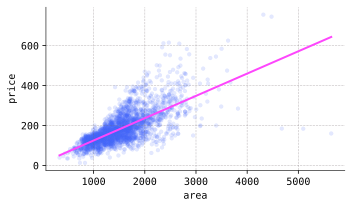

In [1]:
# import all the usual things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib_inline.backend_inline
import seaborn as sns
import scipy as sp
from itertools import product
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

# linear regression example begins below

# import linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# import data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])

# pull out the 'area' column and 'price column from the data and convert them to numpy arrays
x = df['area'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy()

# instantiate a linear regression model
lr = LinearRegression()

# train the model
lr.fit(X=x, y=y)

# get the learned parameters
beta, beta_0 = lr.coef_, lr.intercept_

# build a grid for the regression line
grid = np.linspace(x.min(), x.max())

# plot the regression line
plt.plot(grid, beta * grid + beta_0, color=magenta)

# plot the data
plt.scatter(x=x, y=y, alpha=0.15)

plt.xlabel('area')
plt.ylabel('price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

The positively-sloped line is used to visualize the approximate linear relationship {eq}`approx-linear-eqn`. This is a so-called _least squares line_ or _regression line_; we will learn how to compute them in {numref}`Chapter %s <learning>`.

But for now, let's define our first PGM:

````{prf:definition}

A _linear regression model_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/lin-reg-00.svg
:width: 50%
:align: center
```
&nbsp;

where $\bX \in \mathbb{R}^{1\times n}$. The model has the following parameters:

* A parameter vector $\boldsymbol\beta \in \mathbb{R}^{n\times 1}$.

* A real parameter $\beta_0\in \mathbb{R}$.

* A positive real parameter $\sigma^2>0$.

The link function at $Y$ is given by

$$
\mu \stackrel{\text{def}}{=} \bx \bbeta + \beta_0, \quad \text{where} \quad Y \mid \bX; \ \bbeta,\beta_0,\sigma^2 \sim \mathcal{N}\big(\mu,\sigma^2\big).
$$
````

Before we introduce important terminology associated with linear regression models and look at an example, we need to discuss two probability density functions that will play a crucial role in the [next chapter](learning). The first is just the conditional density function of $Y$ given $\bX$:

```{prf:definition}

1. The _model conditional probability function for a linear regression model_ is the conditional probability density function

    $$
    p\big(y \mid \bx ; \ \bbeta, \beta_0, \sigma^2\big).
    $$

    On its support consisting of all $y\in \bbr$ and $\bx \in \bbr^{1\times n}$, it is given by the formula

    $$
    p\big(y \mid \bx ; \ \bbeta, \beta_0, \sigma^2\big) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left(- \frac{1}{2\sigma^2} ( y - \mu)^2 \right),
    $$

    where $\mu = \bx \bbeta + \beta_0$.

2. Given a dataset

    $$
    (\bx^{(1)}, y^{(1)}), (\bx^{(2)},y^{(2)}),\ldots, (\bx^{(m)},y^{(m)}) \in \bbr^{1\times n} \times \bbr,
    $$

    the _data conditional probability function for a linear regression model_ is the conditional probability density function

    $$
    p\big(y^{(1)},\ldots,y^{(m)} \mid \bx^{(1)},\ldots,\bx^{(m)}; \ \bbeta, \beta_0,\sigma^2 \big) = \prod_{i=1}^m p\big(y^{(i)} \mid \bx^{(i)} ; \ \bbeta, \beta_0, \sigma^2\big).
    $$
```


The components of the vector $\bX$ are referred to as _predictors_, _regressors_, _explanatory variables_, or _independent variables_, while the random variable $Y$ is called the _response variable_ or the _dependent variable_. In the case that $n=1$, the model is called a _simple linear regression model_; otherwise, it is called a _multiple linear regression model_.

Note that

$$
E\big(Y \mid \bX = \bx \big) = \mu = \bx \bbeta + \beta_0,
$$

and so a linear regression model assumes (among other things) that the conditional mean of the response variable is linearly related to the regressors through the link function

$$
\mu = \bx \bbeta + \beta_0.
$$ (lin-reg-line-eqn)

The parameter $\beta_0$ is often called the _intercept_ or _bias term_, while the other $\beta_j$'s (for $j>0$) are called _slope coefficients_ since they are exactly the (infinitesimal) slopes:

$$
\frac{\partial \mu}{\partial x_j} = \beta_j.
$$


The random vector

$$
\dev \stackrel{\text{def}}{=} Y - \bX\bbeta - \beta_0
$$

in a linear regression model is called the _error term_; note then that

$$
Y = \bX\bbeta + \beta_0 + \dev \quad \text{and} \quad \dev \sim \mathcal{N}(0, \sigma^2).
$$ (random-lin-rel-eqn)

This is the manifestation in terms of random vectors and variables of the approximate linear relationship {eq}`approx-linear-eqn` described at the beginning of this section.

Suppose we are given a dataset

$$
(\bx^{(1)}, y^{(1)}), (\bx^{(2)},y^{(2)}),\ldots, (\bx^{(m)},y^{(m)}) \in \bbr^{1\times n} \times \bbr.
$$

If for each $i=1,\ldots,m$, we define the _predicted values_

$$
\hat{y}^{(i)} = \bx^{(i)}\bbeta + \beta_0
$$

and the _residuals_

$$
\dev^{(i)} = y^{(i)} - \hat{y}^{(i)},
$$

then from {eq}`random-lin-rel-eqn` we get

$$
y^{(i)} = \bx^{(i)} \bbeta + \beta_0 + \dev^{(i)}.
$$

This shows that the residuals $\dev^{(i)}$ are observations of the error term $\dev \sim \mathcal{N}(0,\sigma^2)$. Thus, in a linear regression model, all residuals from a dataset are assumed to be modeled by a normal distribution with mean $0$ and a _fixed_ variance; the fixed-variance assumption is sometimes called _homoscedasticity_.

In {numref}`Chapter %s <learning>`, we will learn how to train a linear regression model on a dataset to obtain optimal values of the parameters $\bbeta$ and $\beta_0$. Using these training methods, we obtained values of the parameters for the Ames housing dataset mentioned at the beginning of this section; the positively-sloped line in the scatter plot was the line traced out by the link function $\mu =  \beta x + \beta_0$. The predicted values $\hat{y}^{(i)}$ lie along this line, and the magnitude of the residual $\dev^{(i)}$ may be visualized as the vertical distance from the true data point $y^{(i)}$ to this line. We may plot the residuals $\dev^{(i)}$ against the predictor variables $x^{(i)}$ to get:

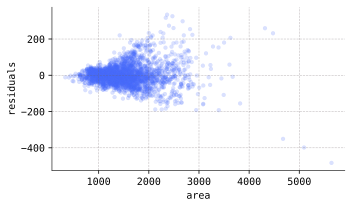

In [2]:
# get the predictions
y_hat = lr.predict(X=x)

# get the residuals
resid = y - y_hat

# plot the residuals vs. area
plt.scatter(x=x, y=resid, alpha=0.20)

plt.xlabel('area')
plt.ylabel('residuals')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

It is evident from this plot that the homoscedasticity assumption is violated since the distributions of the residuals appear to widen as the area variable increases.

As with the parameters $\beta$ and $\beta_0$, it is also possible to learn an optimal value of the variance $\sigma^2$. As another method of model checking, given all the parameters $\beta$, $\beta_0$, and $\sigma^2$, we may generate a new dataset by sampling from the normal distributions 

$$
\mathcal{N}\big(\hat{y}^{(i)}, \sigma^2\big)
$$

for each $i=1,2,\ldots,m$. A scatter plot of one simulated dataset is:

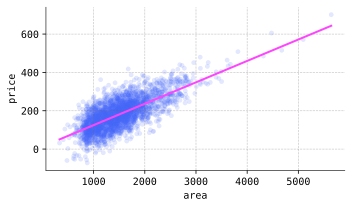

In [3]:
# import statsmodels
import statsmodels.formula.api as smf

# instantiate and train a linear regression model from statsmodels
lr = smf.ols(formula='price ~ area', data=df).fit()

# get the learned standard deviation
sigma = np.sqrt(lr.scale)

# generate the dataset
np.random.seed(42)
y_gen = sp.stats.norm(loc=y_hat, scale=sigma).rvs(2930)
df_gen = pd.DataFrame({'area': df['area'], 'price': y_gen})

# plot the dataset
df_gen.plot(kind='scatter', x='area', y='price', alpha=0.15)

# plot the original regression line
plt.plot(grid, beta_0 + beta * grid, color=magenta)

plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

To compare this simulated dataset against the real one, let's compare KDEs:

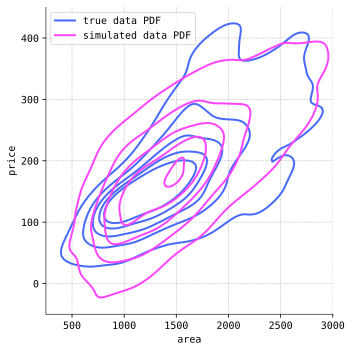

In [4]:
df['indicator'] = 'true data PDF'
df_gen['indicator'] = 'simulated data PDF'
df_combined = pd.concat(objs=[df, df_gen], axis=0)

g = sns.kdeplot(data=df_combined, x='area', y='price', hue='indicator', levels=6)
g.get_legend().set_title(None)
sns.move_legend(obj=g, loc='upper left')
plt.xlim(250, 3000)
plt.ylim(-50, 450)
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()

For smaller values of area, the distribution of the true prices is narrower compared to the simulated prices, while for larger values of area, the distribution of the true prices is wider.












## Logistic regression models

````{prf:definition}

A _logistic regression model_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/log-reg-00.svg
:width: 50%
:align: center
```
&nbsp;

where $\bX\in \mathbb{R}^{1\times n}$. The model has the following parameters:

* A parameter vector $\boldsymbol\beta \in \mathbb{R}^{n\times 1}$.

* A real parameter $\beta_0\in \mathbb{R}$.

The link function at $Y$ is given by

$$
\phi = \sigma(\bx\bbeta + \beta_0), \quad \text{where} \quad Y \mid \bX; \ \bbeta,\beta_0 \sim \mathcal{B}er(\phi).
$$
````

```{prf:definition}

1. The _model conditional probability function for a logistic regression model_ is the conditional probability density function

    $$
    p\big(y \mid \bx ; \ \bbeta, \beta_0\big).
    $$

    On its support consisting of all $y\in \{0,1\}$ and $\bx \in \bbr^{1\times n}$, it is given by the formula

    $$
    p\big(y \mid \bx ; \ \bbeta, \beta_0\big) = \phi^y (1-\phi)^{1-y}
    $$

    where $\phi = \bx \bbeta + \beta_0$.

2. Given a dataset

    $$
    (\bx^{(1)}, y^{(1)}), (\bx^{(2)},y^{(2)}),\ldots, (\bx^{(m)},y^{(m)}) \in \bbr^{1\times n} \times \{0,1\},
    $$

    the _data conditional probability function for a logistic regression model_ is the conditional probability density function

    $$
    p\big(y^{(1)},\ldots,y^{(m)} \mid \bx^{(1)},\ldots,\bx^{(m)}; \ \bbeta, \beta_0\big) = \prod_{i=1}^m p\big(y^{(i)} \mid \bx^{(i)} ; \ \bbeta, \beta_0\big).
    $$

```

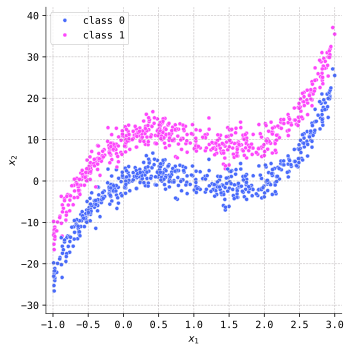

In [5]:
# import the data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch11-book-data-01.csv'
df = pd.read_csv(url)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-1.1, 3.1)
plt.ylim(-32, 42)
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()

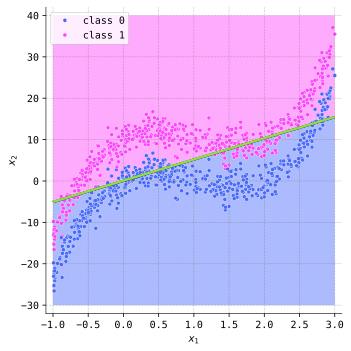

In [6]:
# import logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# pull out the 'x' columns and the 'y' column, and convert to numpy arrays
x = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()

# instantiate a logistic regression model
lr = LogisticRegression()

# train the model
lr.fit(X=x, y=y)

# begin code to plot decision boundary. define resolution of grid.
resolution = 1000

# define grid
x_1 = np.linspace(-1, 3, resolution)
x_2 = np.linspace(-30, 40, resolution)
grid_1, grid_2 = np.meshgrid(x_1, x_2)
grid = np.column_stack((grid_1.reshape((resolution ** 2, -1)), grid_2.reshape((resolution ** 2, -1))))

# apply the fitted model to the grid
z = lr.predict(grid)

# plot the decision boundary and colors
z = z.reshape((resolution, resolution))
cmap = clr.LinearSegmentedColormap.from_list('custom', [blue, magenta], N=2)
plt.contourf(grid_1, grid_2, z, cmap=cmap, alpha=0.45)
plt.contour(grid_1, grid_2, z)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-1.1, 3.1)
plt.ylim(-32, 42)
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()

## Neural network models

````{prf:definition}

A _neural network model_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/nn-00.svg
:width: 50%
:align: center
```
&nbsp;

where $\bX \in \mathbb{R}^{1\times n}$ and $\mathbf{z}\in \mathbb{R}^{1\times k}$. The model has the following parameters:

* A parameter matrix $\boldsymbol\alpha \in \mathbb{R}^{n\times k}$.

* A parameter vector $\boldsymbol\alpha_0 \in \mathbb{R}^{1\times k}$.

* A parameter vector $\boldsymbol\beta \in \mathbb{R}^{k\times 1}$.

* A real parameter $\beta_0 \in \mathbb{R}$.

The link function at $\mathbf{z}$ is given by

$$
\mathbf{z} = \sigma(\mathbf{x}\boldsymbol\alpha + \boldsymbol\alpha_0),
$$

while the link function at $Y$ is given by

$$
\phi = \sigma(\mathbf{z}\boldsymbol\beta + \beta_0), \quad \text{where} \quad Y ;\  \mathbf{z}, \boldsymbol\beta,\beta_0 \sim \mathcal{B}er\big(\phi\big).
$$
````

```{prf:definition}

1. The _model conditional probability function for a neural network model_ is the conditional probability density function

    $$
    p\big(y \mid \bx ; \ \balpha, \balpha_0, \bbeta, \beta_0\big).
    $$

    On its support consisting of all $y\in \{0,1\}$ and $\bx \in \bbr^{1\times n}$, it is given by the formula

    $$
    p\big(y \mid \bx ; \ \bbeta, \beta_0\big) = \phi^y (1-\phi)^{1-y}
    $$

    where $\phi = \sigma(\bz \bbeta + \beta_0)$ and $\bz = \sigma(\bx \balpha + \balpha_0)$.

2. Given a dataset

    $$
    (\bx^{(1)}, y^{(1)}), (\bx^{(2)},y^{(2)}),\ldots, (\bx^{(m)},y^{(m)}) \in \bbr^{1\times n} \times \{0,1\},
    $$

    the _data conditional probability function for a neural network model_ is the conditional probability density function

    $$
    p\big(y^{(1)},\ldots,y^{(m)} \mid \bx^{(1)},\ldots,\bx^{(m)}; \ \balpha, \balpha_0, \bbeta, \beta_0\big) = \prod_{i=1}^m p\big(y^{(i)} \mid \bx^{(i)} ; \ \balpha, \balpha_0, \bbeta, \beta_0\big).
    $$

```

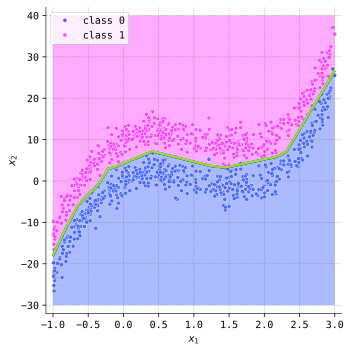

In [7]:
# import pytorch
import torch

# convert the data to torch tensors
x = torch.tensor(data=x, dtype=torch.float32)
y = torch.tensor(data=y, dtype=torch.float32)

# define the neural network model architecture
torch.manual_seed(42)
net = torch.nn.Sequential(torch.nn.Linear(in_features=2, out_features=16),
                   torch.nn.ReLU(),
                   torch.nn.Linear(in_features=16, out_features=1),
                   torch.nn.Sigmoid())

# define the loss function and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters())

# train the model
num_epochs = 8000
for _ in range(num_epochs):
    optimizer.zero_grad()
    y_hat = net(x)
    loss = loss_fn(y_hat.squeeze(), y)
    loss.backward()
    optimizer.step()

# apply the fitted model to the grid
grid = torch.tensor(data=grid, dtype=torch.float32)
z = (net(grid) >= 0.5).to(torch.int32)

# plot the decision boundary and colors
z = z.reshape((resolution, resolution))
cmap = clr.LinearSegmentedColormap.from_list('custom', [blue, magenta], N=2)
plt.contourf(grid_1, grid_2, z, cmap=cmap, alpha=0.45)
plt.contour(grid_1, grid_2, z)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-1.1, 3.1)
plt.ylim(-32, 42)
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()

## Gaussian mixture models

````{prf:definition}

A _(two-component) Gaussian model_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/gmm.svg
:width: 50%
:align: center
```
&nbsp;

The model has the following parameters:

* A real parameter $\phi \in [0,1]$.

* Two real parameters $\mu_0,\mu_1\in \bbr$.

* Two positive real parameters $\sigma_0^2,\sigma_1^2 >0$.

We have $Z \sim \mathcal{B}er(\phi)$, and the link functions at $X$ are given by

$$
\mu = \mu_0(1-z) + \mu_1z, \quad \sigma^2 = \sigma_0^2(1-z) + \sigma_1^2z
$$

and

$$
X \mid Z; \ \mu_0,\sigma_0^2,\mu_1, \sigma^2_1 \sim \mathcal{N}(\mu,\sigma^2).
$$
````

```{prf:definition}

1. The _model joint probability function for a Gaussian mixture model_ is the joint probability density function

    $$
    p\big(x, z ; \ \mu_0,\mu_1, \sigma_0^2, \sigma_1^2, \phi \big).
    $$

    On its support consisting of all $x\in \bbr$ and $z \in \{0,1\}$, it is given by the formula

    $$
    p\big(x, z ; \ \mu_0,\mu_1, \sigma_0^2, \sigma_1^2, \phi \big) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( - \frac{1}{2\sigma^2} (x-\mu)^2 \right) \phi^z (1-\phi)^{1-z}
    $$

    where $\mu = \mu_0(1-z) + \mu_1z$ and $\sigma^2 = \sigma_0^2(1-z) + \sigma_1^2z$.

2. Given a dataset

    $$
    (x^{(1)}, z^{(1)}), (x^{(2)},z^{(2)}),\ldots, (x^{(m)},z^{(m)}) \in \bbr \times \{0,1\},
    $$

    the _data joint probability function for a Gaussian mixture model_ is the joint probability density function

    $$
    p\big(x^{(1)},\ldots,x^{(m)}, z^{(1)},\ldots,z^{(m)} ; \ \mu_0,\mu_1, \sigma_0^2, \sigma_1^2, \phi \big) = \prod_{i=1}^m p\big(x^{(i)}, z^{(i)} ; \ \mu_0,\mu_1, \sigma_0^2, \sigma_1^2, \phi \big).
    $$


```

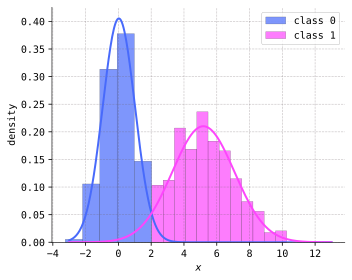

In [8]:
# import gaussian mixture model from scikit-learn
from sklearn.mixture import GaussianMixture

# import data and convert to numpy array
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch11-book-data-02.csv'
df = pd.read_csv(url)
x = df['x'].to_numpy().reshape(-1, 1)

# instantiate the model, fit it to the data, predict components
gmm = GaussianMixture(n_components=2, random_state=42)
z_hat = gmm.fit_predict(X=x)

# cluster the data based on predicted components
class_0 = x[z_hat == 0]
class_1 = x[z_hat == 1]

# pull out the learned parameters
means = gmm.means_
std = np.sqrt(gmm.covariances_)

# define gaussian random variables based on learned parameters
comp_0 = sp.stats.norm(loc=means[0][0], scale=std[0][0][0])
comp_1 = sp.stats.norm(loc=means[1][0], scale=std[1][0][0])

# plot the gaussian density curves
grid = np.linspace(-3, 13, num=300)
plt.plot(grid, comp_0.pdf(grid))
plt.plot(grid, comp_1.pdf(grid))

# plot the data with component labels
plt.hist(x=class_0, alpha=0.7, ec='black', bins=5, density=True, color=blue, label='class 0')
plt.hist(x=class_1, alpha=0.7, ec='black', bins=12, density=True, color=magenta, label='class 1')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('density')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()